Select the random subsample of posts

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the Latte class
from Latte import Latte

# Load the dataset
df = pd.read_csv('data/reddit_sample.csv')

In [2]:
# We start with a toy example of just 15 posts per class
# Select random subsample of posts
N = 15

women_sample = df[df['gender'] == 0].sample(N, random_state = 1)
men_sample = df[df['gender'] == 1].sample(N, random_state = 1)

sample = pd.concat([women_sample, men_sample])

sample.sample(10)

,title,text,gender
2206,I’m in a long distance relationship and my gf ...,NaN,0
26247,What movie has had the most emotional impact o...,NaN,0
85067,What are good ways to be more/ become charisma...,NaN,1
65190,"Unreciprocated ""I Love you."" I'm kinda of bumm...",I'm just relatively new to relationships and a...,1
75816,Everyone always talks about spirit animals. Bu...,This is not a food snob thread. I don't care i...,1
59047,How many of you have a better life divorced or...,NaN,1
12196,Your bikini is falling off and you don't notic...,So I'm sitting at a pool at a hotel and I have...,0
84590,What band would you love to see to make a come...,For me it's Oasis!,1
26370,What are you most passionate about right now?,NaN,0
66668,"Hey AskMen: Mentors, Do you have one? Are you ...",I am finding that I may need some more guidanc...,1


In [3]:
# Initialize the analyzer with the sample
analyzer = Latte(sample, attribute = 'gender')

In [4]:
# Embed texts using default local model

# You can use any other embedding model by passing a different function to the embed method
# For example, you can use OpenAI's embedding model
# def openai_embedding_function(texts):
#     client = OpenAI()
#     embedding_dict = {}
#     for text in texts:    
#         if text not in embedding_dict:
#             response = client.embeddings.create(input=text, model="text-embedding-3-small")
#             embedding_dict[text] = response.data[0].embedding
#     return [embedding_dict[text] for text in texts]
# analyzer.embed(openai_embedding_function)
analyzer.embed()

Using default embedding model (all-MiniLM-L6-v2)...
Generated embeddings with shape: (30, 384)


In [5]:
# Reduce dimensionality of embeddings to two dimensions using UMAP,
# pass the number of neighbors to use in the UMAP model which is sample dependent
analyzer.reduce(n_neighbors = 2)

/Users/v/Labs/Latte/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Reduced embeddings to shape: (30, 2)


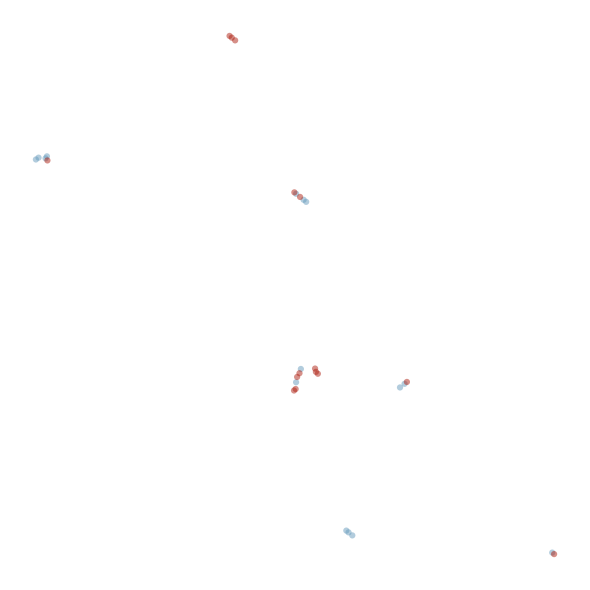

In [6]:
# Plot the resulting 2D embeddings to check for clustering
analyzer.plot_embeddings()

In [7]:
# Run HDBSCAN algorithm, parameters are dataset dependent
analyzer.cluster(min_cluster_size = 3, min_samples = 2)

/Users/v/Labs/Latte/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/v/Labs/Latte/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


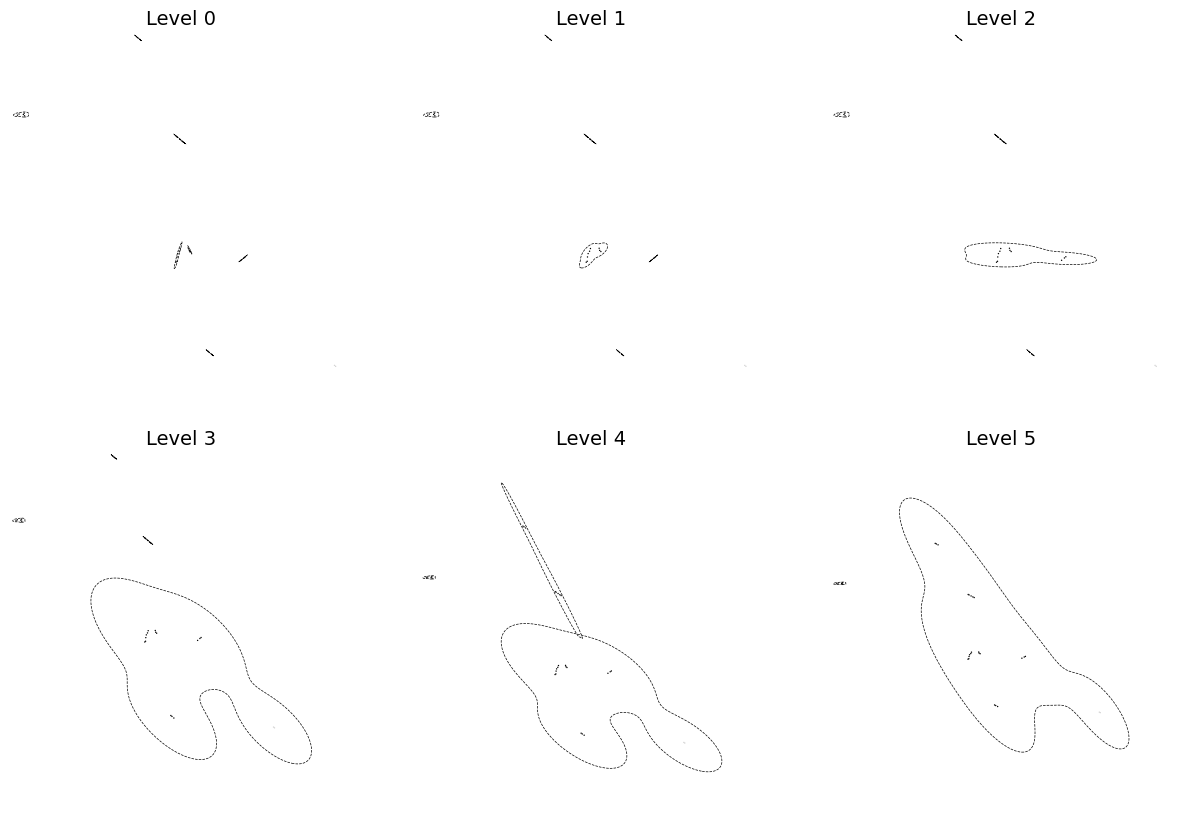

In [8]:
# Plot the clusters at cetrain aggregation level. Level = 0 means the leafs of the cluster tree
# Level = 1 means the clusters at the next level of the tree, etc.
# See example below for intuition regarding the meaning of levels
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes = axes.flatten()

for level in range(6):
    ax = axes[level]
    
    # Plot the clusters for this level
    analyzer.plot_clusters(
        level=level,
        marker_size=1,  # Smaller markers for a cleaner look
        alpha=1,
        show_contours=True,
        fill_contours=False,
        ax=ax
    )
    
    ax.set_title(f"Level {level}", fontsize=14)

In [9]:
analyzer.print_clusters(level = 0)

=== Cluster 31 (5 items) ===
Leaning: -0.60

Do these excuses sound like bullshit?
Ladies with multiple jobs/responsibilities, how do you handle it all?
Road trip with wife. How to make it fun?
I am a big men who never had a fight and is feared of ever having one. What can i do?
Have you done something brave and new and adventurous? Were you scared?


=== Cluster 35 (5 items) ===
Leaning: -0.20

what do men really want in a relationship?
How many of you have a better life divorced or single and never married?
Have you ever had a crush on (or gotten together with) someone with a low self esteem?
Found out I can't have kids. Can I ask you guys, do women who don't have kids age better? What "benefits" are there to my situation you've noticed?
It seems like women are shamed for wanting children or not wanting children, by both men and women. Why can't we just be ok with other people's life choices?


=== Cluster 36 (3 items) ===
Leaning: +1.00

What are good ways to be more/ become charism

In [10]:
# Annotating clusters using LLM
# By default Qwen2.5-7B-Instruct is used
# You can pass a different LLM function to the annotate method,
# e.g. using OpenAI API
# analyzer.annotate(llm_function = openai_annotation_function)
analyzer.annotate()

Loading LLM model: Qwen/Qwen2.5-7B-Instruct


Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]


Annotating cluster 1/13 (ID: 30) with 30 titles
Inference took 3.24 seconds

Annotating cluster 2/13 (ID: 31) with 5 titles
Inference took 1.41 seconds

Annotating cluster 3/13 (ID: 32) with 25 titles
Inference took 2.90 seconds

Annotating cluster 4/13 (ID: 33) with 8 titles
Inference took 2.30 seconds

Annotating cluster 5/13 (ID: 34) with 17 titles
Inference took 1.79 seconds

Annotating cluster 6/13 (ID: 35) with 5 titles
Inference took 1.57 seconds

Annotating cluster 7/13 (ID: 36) with 3 titles
Inference took 1.37 seconds

Annotating cluster 8/13 (ID: 37) with 3 titles
Inference took 1.51 seconds

Annotating cluster 9/13 (ID: 38) with 12 titles
Inference took 1.57 seconds

Annotating cluster 10/13 (ID: 39) with 3 titles
Inference took 1.30 seconds

Annotating cluster 11/13 (ID: 40) with 9 titles
Inference took 1.61 seconds

Annotating cluster 12/13 (ID: 41) with 6 titles
Inference took 1.30 seconds

Annotating cluster 13/13 (ID: 42) with 3 titles
Inference took 1.28 seconds


In [11]:
analyzer.print_clusters(level = 0)

=== Cluster 31 (5 items) ===
Leaning: -0.60
Life advice and personal challenges

Do these excuses sound like bullshit?
Ladies with multiple jobs/responsibilities, how do you handle it all?
Road trip with wife. How to make it fun?
I am a big men who never had a fight and is feared of ever having one. What can i do?
Have you done something brave and new and adventurous? Were you scared?


=== Cluster 35 (5 items) ===
Leaning: -0.20
Relationship dynamics and fertility issues

what do men really want in a relationship?
How many of you have a better life divorced or single and never married?
Have you ever had a crush on (or gotten together with) someone with a low self esteem?
Found out I can't have kids. Can I ask you guys, do women who don't have kids age better? What "benefits" are there to my situation you've noticed?
It seems like women are shamed for wanting children or not wanting children, by both men and women. Why can't we just be ok with other people's life choices?


=== Cluster

In [2]:
# Let's consider a larger sample of posts
N = 100

women_sample = df[df['gender'] == 0].sample(N, random_state = 1)
men_sample = df[df['gender'] == 1].sample(N, random_state = 1)

sample = pd.concat([women_sample, men_sample])

In [3]:
analyzer = Latte(sample, attribute = 'gender')
analyzer.embed().reduce(3).cluster(5)

Using default embedding model (all-MiniLM-L6-v2)...
Generated embeddings with shape: (200, 384)


/Users/v/Labs/Latte/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Reduced embeddings to shape: (200, 2)


/Users/v/Labs/Latte/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/v/Labs/Latte/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

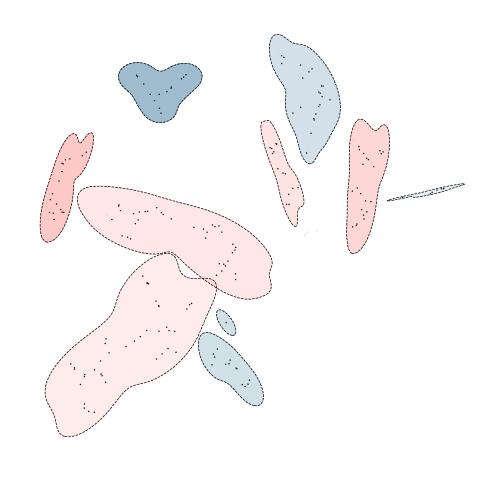

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))

analyzer.plot_clusters(
    level=5,
    marker_size=1,  # Smaller markers for a cleaner look
    alpha=1,
    show_contours=True,
    fill_contours=True,
    ax=axes
)

In [5]:
analyzer.annotate()

Loading LLM model: Qwen/Qwen2.5-7B-Instruct


Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]


Annotating cluster 1/27 (ID: 200) with 50 titles
Inference took 3.40 seconds

Annotating cluster 2/27 (ID: 201) with 15 titles
Inference took 1.86 seconds

Annotating cluster 3/27 (ID: 202) with 50 titles
Inference took 3.58 seconds

Annotating cluster 4/27 (ID: 203) with 50 titles
Inference took 3.48 seconds

Annotating cluster 5/27 (ID: 204) with 50 titles
Inference took 3.08 seconds

Annotating cluster 6/27 (ID: 205) with 17 titles
Inference took 3.55 seconds

Annotating cluster 7/27 (ID: 206) with 50 titles
Inference took 4.27 seconds

Annotating cluster 8/27 (ID: 207) with 50 titles
Inference took 5.40 seconds

Annotating cluster 9/27 (ID: 208) with 40 titles
Inference took 3.20 seconds

Annotating cluster 10/27 (ID: 209) with 39 titles
Inference took 2.63 seconds

Annotating cluster 11/27 (ID: 210) with 32 titles
Inference took 2.86 seconds

Annotating cluster 12/27 (ID: 211) with 6 titles
Inference took 1.30 seconds

Annotating cluster 13/27 (ID: 212) with 9 titles
Inference to

In [6]:
analyzer.print_clusters(level = 5)

=== Cluster 201 (15 items) ===
Leaning: -0.60
Sexual health and relationships

Which is more sexually frustrating for you - premature ejaculation or erectile disfunction?
Is it normal to feel pain while peeing for 1-2 days when you've had sex/been fingered?
Guys, have you ever had a dry spell where you want to masturbate, but can't bring yourself to do it?
Date at my place
What are your tips and must haves to make the best road trip?
...


=== Cluster 205 (17 items) ===
Leaning: +0.29
Relationship and friendship dynamics, including jealousy, past relationships, and gender issues.

I'm a female engineer being harassed at work by a trans woman
What do you do if a year down the hole dating you find out your gf Christina used to be Christopher? But went through complete s*x change op
How do I deal with my roommate?
Should I or should I not?
Bro code opinion, male and female views pls
...


=== Cluster 208 (40 items) ===
Leaning: +0.10
Relationships and personal experiences

What pissed you

In [2]:
# Let's consider even larger sample of posts

N = 1000

sample = pd.concat([df[df['gender'] == 0].sample(N, random_state = 1), df[df['gender'] == 1].sample(N, random_state = 1)])

Using default embedding model (all-MiniLM-L6-v2)...
Generated embeddings with shape: (2000, 384)


/Users/v/Labs/Latte/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Reduced embeddings to shape: (2000, 2)


/Users/v/Labs/Latte/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/v/Labs/Latte/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

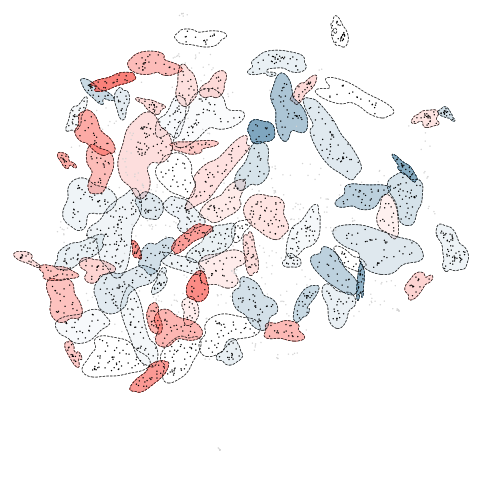

In [ ]:
analyzer = Latte(sample, attribute = 'gender')
analyzer.embed().reduce(5).cluster(10, 1)

fig, axes = plt.subplots(1, 1, figsize=(6, 6))
analyzer.plot_clusters(level=30,marker_size=1,alpha=1,show_contours=True,fill_contours=True,ax=axes)

In [5]:
analyzer.annotate()

Loading LLM model: Qwen/Qwen2.5-7B-Instruct


Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]


Annotating cluster 1/173 (ID: 2000) with 50 titles
Inference took 3.66 seconds

Annotating cluster 2/173 (ID: 2001) with 24 titles
Inference took 2.23 seconds

Annotating cluster 3/173 (ID: 2002) with 50 titles
Inference took 3.33 seconds

Annotating cluster 4/173 (ID: 2003) with 40 titles
Inference took 2.82 seconds

Annotating cluster 5/173 (ID: 2004) with 50 titles
Inference took 3.61 seconds

Annotating cluster 6/173 (ID: 2005) with 49 titles
Inference took 3.75 seconds

Annotating cluster 7/173 (ID: 2006) with 50 titles
Inference took 3.57 seconds

Annotating cluster 8/173 (ID: 2007) with 30 titles
Inference took 2.34 seconds

Annotating cluster 9/173 (ID: 2008) with 50 titles
Inference took 4.10 seconds

Annotating cluster 10/173 (ID: 2009) with 14 titles
Inference took 1.94 seconds

Annotating cluster 11/173 (ID: 2010) with 21 titles
Inference took 3.20 seconds

Annotating cluster 12/173 (ID: 2011) with 19 titles
Inference took 1.81 seconds

Annotating cluster 13/173 (ID: 2012)

In [6]:
analyzer.print_clusters(level = 30)

=== Cluster 2001 (24 items) ===
Leaning: 0.00
Music and emotions during romantic experiences

What album helped you get over a breakup?
What kinds of music do you listen to when getting over a crush?
What songs reminds you of your significant other?
What is you and your SO's song?
Can you recommend some love songs that aren't about terrible relationships?
...


=== Cluster 2003 (40 items) ===
Leaning: 0.00
Food and Cooking Practices

You book a hotel room; what's the first thing you do when you get in?
What do you have in the house to keep warm?
When you spend the night at an your SO's place, what do you bring with you?
(Woman here) Guys who game: what is your preferred snack/ drink/ etc set up when you are gaming? What are some things that, if you have them, are definitely part of the process?
How do sharks and eals eat lionfish and not die to its venomous spines when it gets into thier stomach?
...


=== Cluster 2005 (49 items) ===
Leaning: -0.10
Groominging and personal care routine

In [3]:
# Let's consider even larger sample of posts
N = 10000

sample = pd.concat([df[df['gender'] == 0].sample(N, random_state = 1), df[df['gender'] == 1].sample(N, random_state = 1)])

In [5]:
analyzer = Latte(sample, attribute = 'gender')
analyzer.embed().reduce().cluster(10)

Using default embedding model (all-MiniLM-L6-v2)...
Generated embeddings with shape: (20000, 384)


/Users/v/Labs/Latte/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Reduced embeddings to shape: (20000, 2)


/Users/v/Labs/Latte/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/v/Labs/Latte/venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly s

<Axes: >

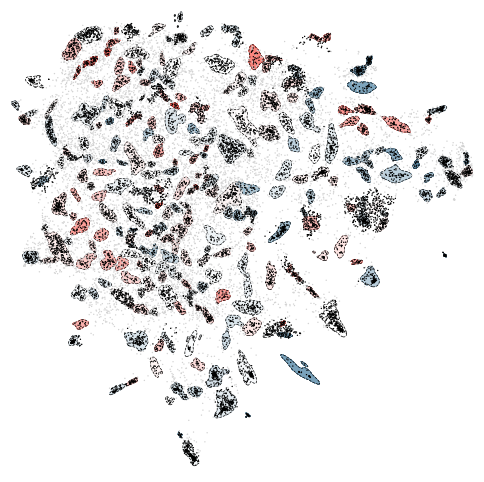

In [17]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
analyzer.plot_clusters(level=20,marker_size=1,alpha=1,show_contours=True,fill_contours=True,ax=axes)

In [18]:
analyzer.annotate()

Loading LLM model: Qwen/Qwen2.5-7B-Instruct


Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]


Annotating cluster 1/597 (ID: 20000) with 50 titles
Inference took 4.01 seconds

Annotating cluster 2/597 (ID: 20001) with 27 titles
Inference took 2.58 seconds

Annotating cluster 3/597 (ID: 20002) with 50 titles
Inference took 3.50 seconds

Annotating cluster 4/597 (ID: 20003) with 50 titles
Inference took 2.98 seconds

Annotating cluster 5/597 (ID: 20004) with 50 titles
Inference took 3.36 seconds

Annotating cluster 6/597 (ID: 20005) with 24 titles
Inference took 2.62 seconds

Annotating cluster 7/597 (ID: 20006) with 50 titles
Inference took 3.99 seconds

Annotating cluster 8/597 (ID: 20007) with 50 titles
Inference took 3.65 seconds

Annotating cluster 9/597 (ID: 20008) with 50 titles
Inference took 3.54 seconds

Annotating cluster 10/597 (ID: 20009) with 36 titles
Inference took 3.78 seconds

Annotating cluster 11/597 (ID: 20010) with 38 titles
Inference took 2.84 seconds

Annotating cluster 12/597 (ID: 20011) with 50 titles


KeyboardInterrupt: 

In [ ]:
analyzer.print_clusters(level = 20)